<a href="https://colab.research.google.com/github/ibext/AI-project/blob/main/Copy_of_Solution_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#          **Laboratory 6**

#*Exercise 1 *

Using tensorflow, construct and train a CNN for classification of MNIST dataset. Be able to explain details of your implementation and justify the decisions made. 
 


In [ ]:
!pip install tensorflow keras numpy mnist matplotlib


In [ ]:
#import the packages / dependencies
import numpy as np
import mnist #Get data set from 
import matplotlib.pyplot as plt #Graph
from keras.models import Sequential #ANN architecture
from keras.layers import Dense #The layers in the ANN
from keras.utils import to_categorical

In [ ]:
#load the dataset 
train_images = mnist.train_images() #training data images
train_labels = mnist.train_labels() #training data labels
test_images  = mnist.test_images() #testing data images
test_labels = mnist.test_labels()  #testing data labels

In [ ]:
#Normize the images. Normalize the pixel value from [0, 255] to [-0.5 , 0.5] to make our network easier to train
train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5

#Flatten the images. flatten each 28X28 image into a 28^2 = 784 dimensional vector to pass into the neural network
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

#Priint the shape
print(train_images.shape) #60,000 rows and 784 cols
print(test_images.shape) #10,000 rows and 784 cols

(60000, 784)
(10000, 784)


In [ ]:
#Build the model 
# 3 layers, 2 layers with 64 neurons and the Relu function
# 1 layers with 10 neurons and softmax function
model = Sequential()
model.add(Dense (64, activation="relu", input_dim =784))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
#compile the model
#The loss function measures how well the model did on training, and then tries to improve on it using the optimizer
model.compile(
    optimizer= "adam", 
    loss = "categorical_crossentropy", #classes that are greater than 2
    metrics = ['accuracy']
)

In [ ]:
#Train the model
model.fit(
    train_images,
    to_categorical(train_labels), #It is expected to be on this form [1,1,0,0,0,0,0,1,0,1]
    epochs = 5, #the number of iteration over the entire dataset to train on
    batch_size = 32 #the number of sample per gradient update for training 
)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5816 - accuracy: 0.8214
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2154 - accuracy: 0.9347
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1585 - accuracy: 0.9519
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1301 - accuracy: 0.9601
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1112 - accuracy: 0.9655


In [ ]:
#Evaluate the model 
model.evaluate(
    test_images,
    to_categorical(test_labels)
)

313/313 [==============================] - 1s 2ms/step - loss: 0.1499 - accuracy: 0.9515


[0.14988389611244202, 0.9514999985694885]

In [ ]:
#predict on the first 5 test images
predictions = model.predict(test_images[:8])

#print our models prediction 
print(np.argmax(predictions, axis = 1))
print(test_labels[:8])

[7 2 1 0 4 1 4 9]
[7 2 1 0 4 1 4 9]


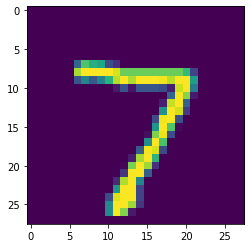

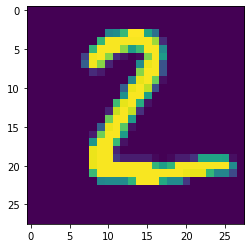

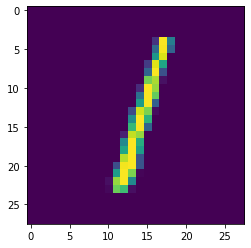

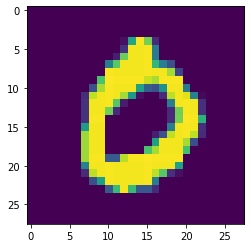

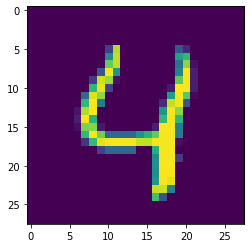

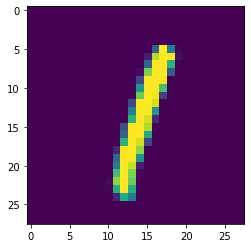

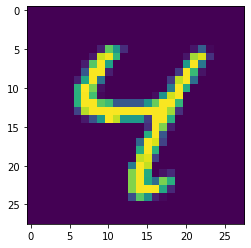

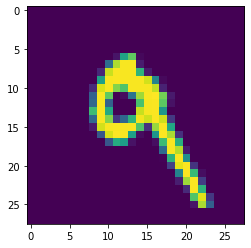

In [ ]:
for i in range(0,8):
  print_image = test_images[i]
  print_image = np.array(print_image, dtype="float")
  pixels = print_image.reshape((28,28))
  plt.imshow(pixels)
  plt.show()